In [223]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import random
from scipy.spatial import distance_matrix

In [224]:
dataset = pd.read_csv('Mumbai.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking','SwimmingPool','LiftAvailable'])

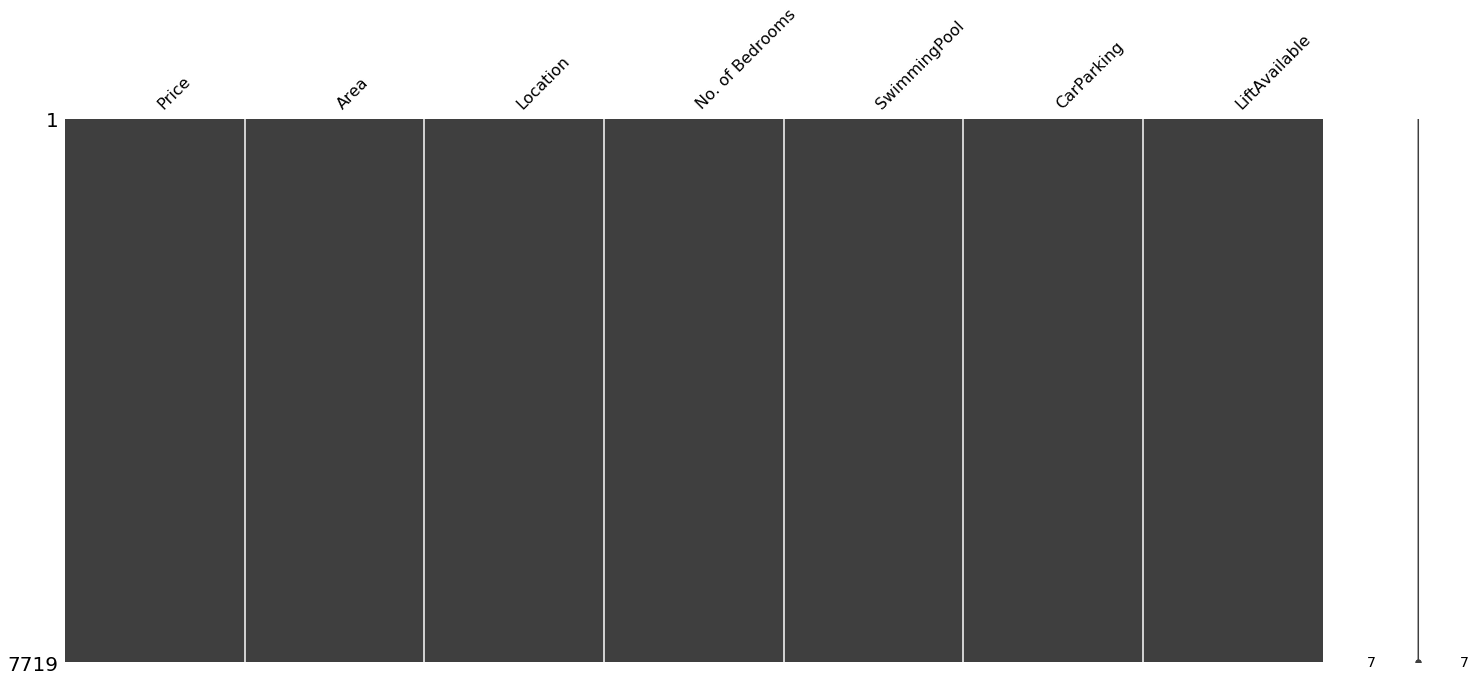

In [227]:
import missingno
missingno.matrix(dataset)

1    4447
0    3272
Name: CarParking, dtype: int64

In [226]:
dataset['CarParking'] = dataset['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [214]:
location_stats = dataset.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
location_stats_less_than_50 = location_stats[location_stats<=50]
dataset['Location'] = dataset['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)
dummies = pd.get_dummies(dataset['Location'])
dataset = pd.concat([dataset,dummies.drop('other',axis='columns')],axis=1)
dataset.head()

,Price,Area,Location,No. of Bedrooms,SwimmingPool,CarParking,LiftAvailable,Andheri East,Andheri West,Boisar,...,Naigaon East,Nala Sopara,Panvel,Powai,Taloja,Thane,Thane West,Ulwe,Ville Parle East,Virar
0,4850000,720,Kharghar,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5000000,665,Kharghar,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
dataset.drop(['Location'],inplace=True, axis=1)

In [216]:
dataset['Price1']=dataset['Price']
dataset.drop(["Price"],inplace=True,axis=1)

In [217]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [218]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [219]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
y_pred=reg.predict(X_test)

In [221]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1305865785281951